<a href="https://colab.research.google.com/github/HKubinhetz/DS-GoogleTrends/blob/main/Google_Trends_and_Data_Visualisation_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('/content/drive/MyDrive/PythonDS/04 - Google Trends/TESLA Search Trend vs Price.csv')
df_tesla.name = "Tesla Trends"

df_btc_search = pd.read_csv('/content/drive/MyDrive/PythonDS/04 - Google Trends/Bitcoin Search Trend.csv')
df_btc_search.name = "BTC Searches"

df_btc_price = pd.read_csv('/content/drive/MyDrive/PythonDS/04 - Google Trends/Daily Bitcoin Price.csv')
df_btc_price.name = "BTC Prices"

df_unemployment_19 = pd.read_csv('/content/drive/MyDrive/PythonDS/04 - Google Trends/UE Benefits Search vs UE Rate 2004-19.csv')
df_unemployment_19.name = "UE 19 Trends"

df_unemployment_20 = pd.read_csv('/content/drive/MyDrive/PythonDS/04 - Google Trends/UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment_20.name = "UE 20 Trends"

df_list = [df_tesla, df_btc_search, df_btc_price, df_unemployment_19, df_unemployment_20]

# Data Exploration

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
# Studying every Dataframe in the project.

for dataframe in df_list:
  print(f"--------------------{dataframe.name}--------------------")
  print(f"The shape of the {dataframe.name} dataframe is {dataframe.shape}")
  print(f"Meaning there are {dataframe.shape[0]} rows and {dataframe.shape[1]} columns in its composition.")
  print(f"The columns of this Dataframe are: {dataframe.columns.values}.")
  print(f"\n{dataframe.describe()}")
  print(f"\n{dataframe.head()}")
  print(f"\n\n")

--------------------Tesla Trends--------------------
The shape of the Tesla Trends dataframe is (124, 3)
Meaning there are 124 rows and 3 columns in its composition.
The columns of this Dataframe are: ['MONTH' 'TSLA_WEB_SEARCH' 'TSLA_USD_CLOSE'].

       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007

        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368



--------------------BTC Searches--------------------
The shape of the BTC Searches dataframe is (73, 2)
Meaning the

### Tesla

In [4]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


### Unemployment Data

In [5]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment_19.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [6]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [7]:
# Checking missing values on every Dataframe in the project.

for dataframe in df_list:
  print(f"Missing values in {dataframe.name}?")
  print(f"{dataframe.isna().values.any()}\n")

Missing values in Tesla Trends?
False

Missing values in BTC Searches?
False

Missing values in BTC Prices?
True

Missing values in UE 19 Trends?
False

Missing values in UE 20 Trends?
False



In [8]:
print(f'Number of missing values in BTC: {df_btc_price.isna().values.sum()}')
print(df_btc_price[df_btc_price.CLOSE.isna()])

Number of missing values in BTC: 2
            DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN


**Challenge**: Remove any missing values that you found. 

In [9]:
df_btc_price = df_btc_price.dropna()
print(df_btc_price.isna().any())

DATE      False
CLOSE     False
VOLUME    False
dtype: bool


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [10]:
# Converting time columns from string to datetime format
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_unemployment_19.MONTH = pd.to_datetime(df_unemployment_19.MONTH)
df_unemployment_20.MONTH =pd.to_datetime(df_unemployment_20.MONTH)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
# Checking the columns if the conversion was successful
print(df_tesla.MONTH)
print(df_btc_search.MONTH)
print(df_btc_price.DATE)
print(df_unemployment_19.MONTH)
print(df_unemployment_20.MONTH)

0     2010-06-01
1     2010-07-01
2     2010-08-01
3     2010-09-01
4     2010-10-01
         ...    
119   2020-05-01
120   2020-06-01
121   2020-07-01
122   2020-08-01
123   2020-09-01
Name: MONTH, Length: 124, dtype: datetime64[ns]
0    2014-09-01
1    2014-10-01
2    2014-11-01
3    2014-12-01
4    2015-01-01
        ...    
68   2020-05-01
69   2020-06-01
70   2020-07-01
71   2020-08-01
72   2020-09-01
Name: MONTH, Length: 73, dtype: datetime64[ns]
0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
2199   2020-09-24
2200   2020-09-25
2201   2020-09-26
2202   2020-09-27
2203   2020-09-28
Name: DATE, Length: 2203, dtype: datetime64[ns]
0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004-04-01
4     2004-05-01
         ...    
176   2018-09-01
177   2018-10-01
178   2018-11-01
179   2018-12-01
180   2019-01-01
Name: MONTH, Length: 181, dtype: datetime64[ns]
0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [12]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [13]:
df_btc_monthly

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,3.470730e+07
2014-10-31,2014-10-31,338.321014,1.254540e+07
2014-11-30,2014-11-30,378.046997,9.194440e+06
2014-12-31,2014-12-31,320.192993,1.394290e+07
2015-01-31,2015-01-31,217.464005,2.334820e+07
...,...,...,...
2020-05-31,2020-05-31,9461.058594,2.777329e+10
2020-06-30,2020-06-30,9137.993164,1.573580e+10
2020-07-31,2020-07-31,11323.466797,2.316047e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

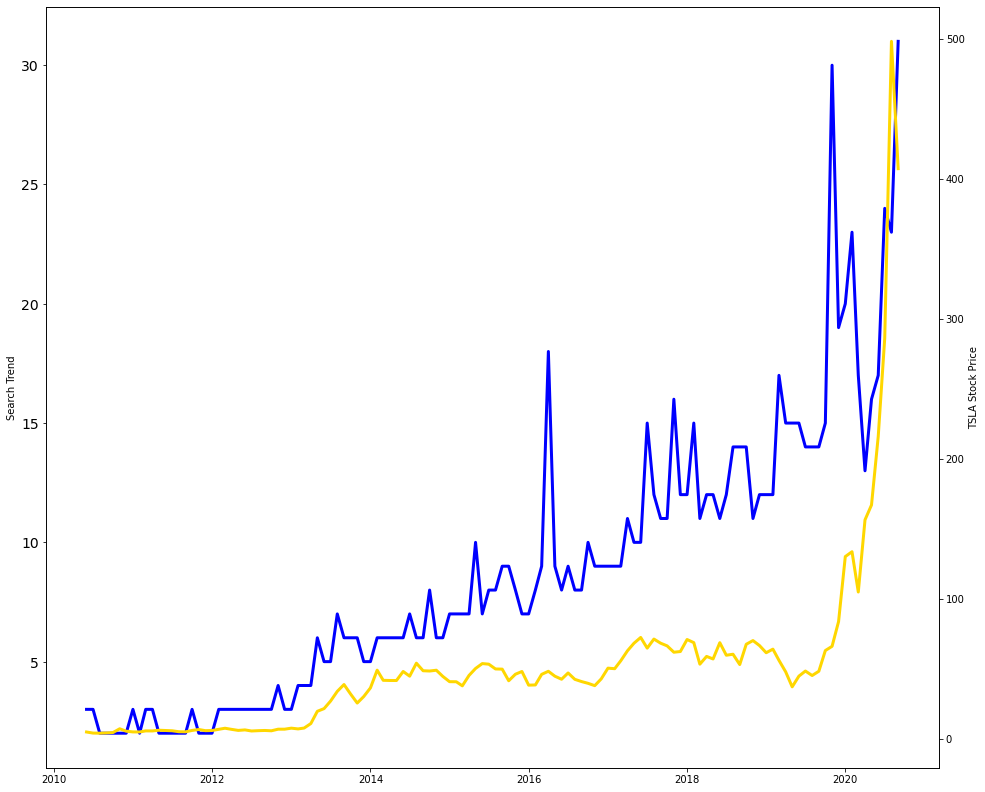

In [15]:
# Create locators for ticks on the time axis
plt.figure(figsize=(16,14))

plt.xticks(ticks=[], fontsize=14)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Search Trend')
ax2.set_ylabel('TSLA Stock Price')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, 'blue', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, 'gold', linewidth=3)

In [ ]:
# Register date converters to avoid warning messages
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis. 

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?